In [1]:
### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Importing data

In [3]:
data_path = r'C:\Users\gerar\CareerFoundry Python\Instacart Basket Analysis'

In [4]:
# order_products_merge_group.pkl is from Achievement 4.8
df_orders_products_merge = pd.read_pickle(os.path.join(data_path, '02 Data', 'Prepared Data', 'orders_products_merge_group.pkl'))

In [5]:
# shape of imported dataframe
df_orders_products_merge.shape

(32404859, 24)

In [6]:
df_orders_products_merge.head(1)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,customer_order_count,order_day_of_the_week,order_hour_of_day,...,price_range_loc,busiest_day,busiest_days_new,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_prior_days,frequency_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Mid_range_price,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer


<Axes: xlabel='order_day_of_the_week'>

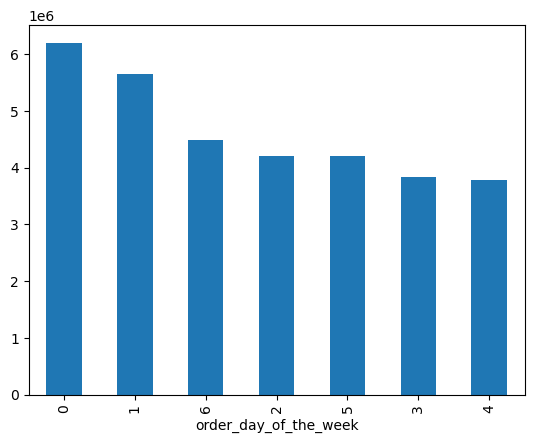

In [7]:
# plot a bar chart for order_day_of_the_week using value counts. 
df_orders_products_merge['order_day_of_the_week'].value_counts().plot.bar() 

<Axes: xlabel='order_day_of_the_week'>

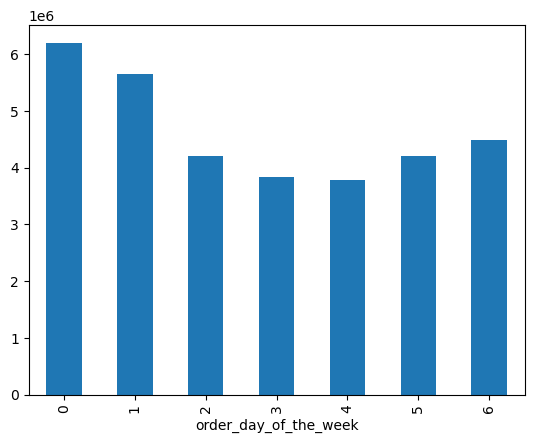

In [8]:
# plot with the index sorting 
df_orders_products_merge['order_day_of_the_week'].value_counts().sort_index().plot.bar()

In [9]:
# use the same .sort_index() trick for value counts
df_orders_products_merge['order_day_of_the_week'].value_counts().sort_index()

order_day_of_the_week
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

In [10]:
# without
df_orders_products_merge['order_day_of_the_week'].value_counts()

order_day_of_the_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

### Creating a bar chart

<Axes: xlabel='order_day_of_the_week'>

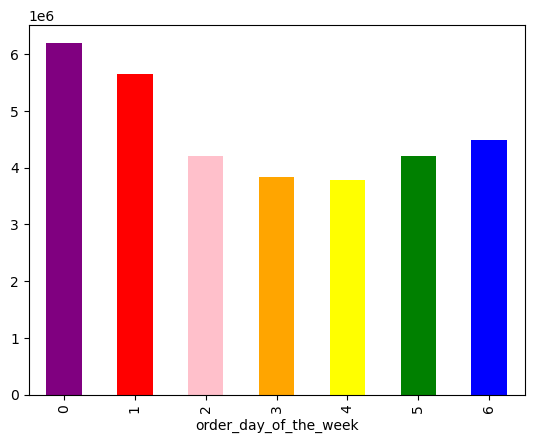

In [11]:
# plot with the index sorting 
df_orders_products_merge['order_day_of_the_week'].value_counts().sort_index().plot.bar(color= ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

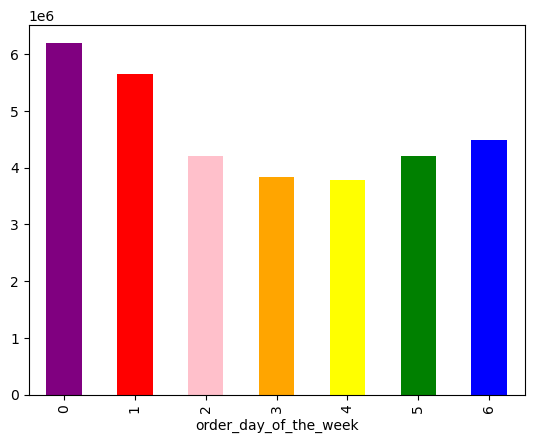

In [12]:
# creating an object where the chart will be stored
bar_chart = df_orders_products_merge['order_day_of_the_week'].value_counts().sort_index().plot.bar(color= ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

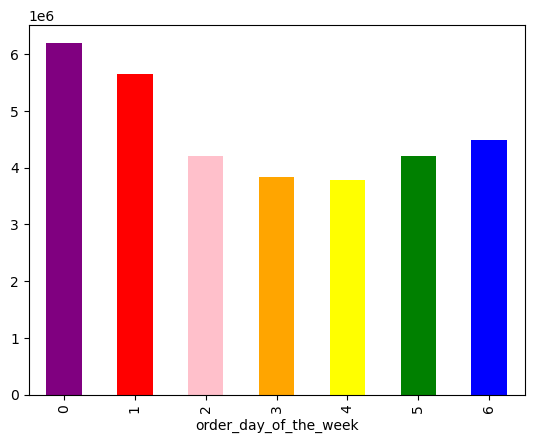

In [13]:
# access visualization
bar_chart.figure

In [16]:
# export visualization object with .figure.savefig( ... )

bar_chart.figure.savefig(os.path.join(data_path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

### Creating a histogram

<Axes: ylabel='Frequency'>

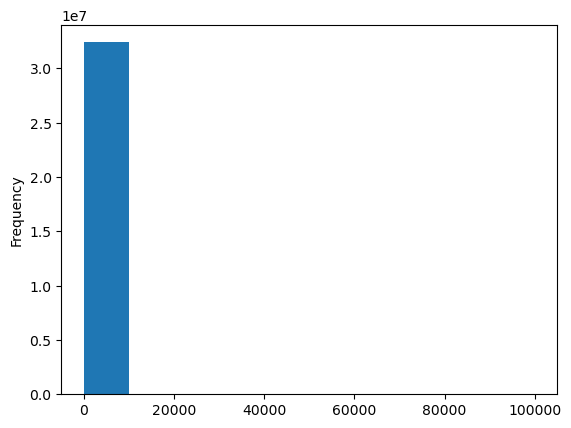

In [21]:
# use plot.hist(bins = number)
df_orders_products_merge['prices'].plot.hist(bins=10)

In [23]:
df_orders_products_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

### Creating a scatterplot

<Axes: xlabel='prices', ylabel='prices'>

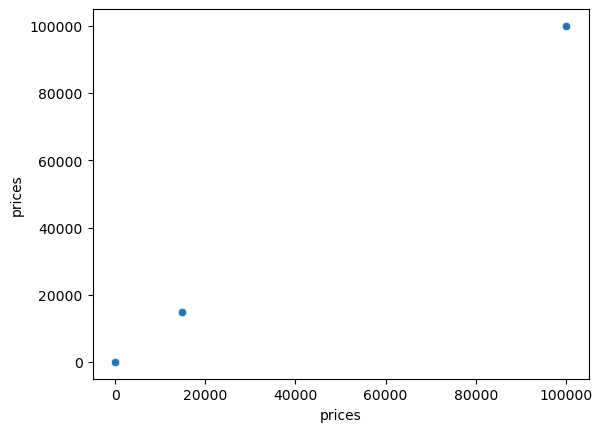

In [25]:
# use sns.scatterplot to create a scatterplot of the 'prices' variable
sns.scatterplot(x='prices', y='prices', data = df_orders_products_merge )

In [26]:
# use .loc to find prices higher than 100
df_orders_products_merge.loc[df_orders_products_merge['prices']> 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,customer_order_count,order_day_of_the_week,order_hour_of_day,...,price_range_loc,busiest_day,busiest_days_new,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_prior_days,frequency_flag
13100147,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,12,2,14,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
13100148,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,22,6,16,...,High-range product,Regularly busy,Regularly busy,Average orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
13100149,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,2,2,21,...,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
13100150,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,3,0,8,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
13100151,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,8,1,19,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,29,0,8,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
21786877,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,31,0,9,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
21786878,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,13,3,15,...,High-range product,Regularly busy,Least busy days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
21786879,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,7,3,20,...,High-range product,Regularly busy,Least busy days,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [27]:
# turn outlier price values as nan
df_orders_products_merge.loc[df_orders_products_merge['prices']>100, 'prices'] = np.nan

In [30]:
df_orders_products_merge['prices'].max()

25.0

### Histogram with corrected values

<Axes: ylabel='Frequency'>

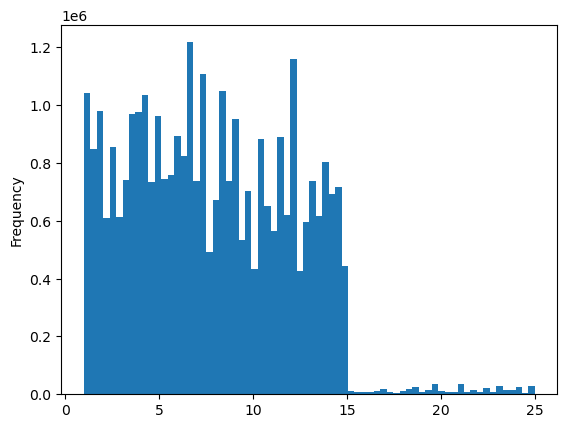

In [33]:
# use plot.hist(bins = number)
df_orders_products_merge['prices'].plot.hist(bins=70)

### Scatterplot with corrected values

<Axes: xlabel='prices', ylabel='prices'>

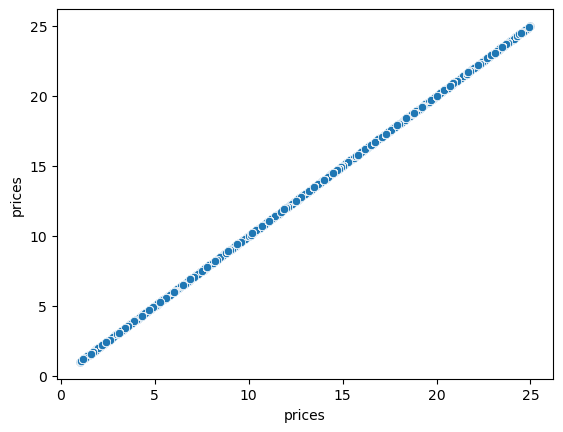

In [31]:
# use sns.scatterplot to create a scatterplot of the 'prices' variable
sns.scatterplot(x='prices', y='prices', data = df_orders_products_merge )

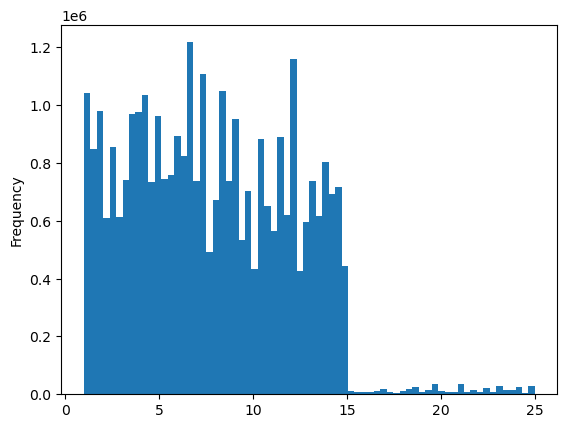

In [35]:
hist_chart = df_orders_products_merge['prices'].plot.hist(bins=70)
hist_chart.figure.savefig(os.path.join(data_path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

### Line chart

In [37]:
# create samples with random floatings numbers using np.random.seed(4)
np.random.seed(4)
dev = np.random.rand(len(df_orders_products_merge)) <=0.7 

In [38]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [39]:
big = df_orders_products_merge[dev]

In [40]:
small = df_orders_products_merge[~dev]

In [42]:
len(df_orders_products_merge)

32404859

In [43]:
len(big)+len(small)

32404859

In [44]:
df_2 = small[['order_day_of_the_week', 'prices']]

C:\Users\gerar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gerar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


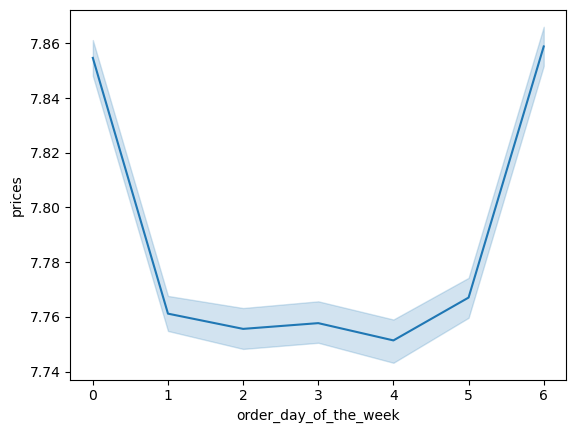

In [45]:
line_chart = sns.lineplot(data = df_2, x = 'order_day_of_the_week', y = 'prices')

In [ ]:
df_4 = 